# Comparative Analysis of Machine Learning Methods to Predict Injury Severity in Vehicle Crashes

## Research Question
**Can crash level features of urban traffic crashes predict the severity of the injuries, and what machine learning approach can perform optimally overall?**

## Dataset Description
**The dataset in this analysis comprises over 112,000 traffic crash records in the real world, which are found in Chicago Data Portal. Every record relates to one crash event and includes 48 attributes of the crash circumstances on 2024.**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


## Load the Data


In [ ]:

# Load Dataset
df = pd.read_csv("Traffic_crash.csv")



## Data Exploration

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112049 entries, 0 to 112048
Data columns (total 48 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   CRASH_RECORD_ID                112049 non-null  object 
 1   CRASH_DATE_EST_I               7369 non-null    object 
 2   CRASH_DATE                     112049 non-null  object 
 3   POSTED_SPEED_LIMIT             112049 non-null  int64  
 4   TRAFFIC_CONTROL_DEVICE         112049 non-null  object 
 5   DEVICE_CONDITION               112049 non-null  object 
 6   WEATHER_CONDITION              112049 non-null  object 
 7   LIGHTING_CONDITION             112049 non-null  object 
 8   FIRST_CRASH_TYPE               112049 non-null  object 
 9   TRAFFICWAY_TYPE                112049 non-null  object 
 10  LANE_CNT                       17 non-null      float64
 11  ALIGNMENT                      112049 non-null  object 
 12  ROADWAY_SURFACE_COND          

In [ ]:

print(df.describe(include='all'))

                                          CRASH_RECORD_ID CRASH_DATE_EST_I  \
count                                              112049             7369   
unique                                             112049                2   
top     12be68def303687ad4555b9f6ca7fa3cb455e147d677fb...                Y   
freq                                                    1             6442   
mean                                                  NaN              NaN   
std                                                   NaN              NaN   
min                                                   NaN              NaN   
25%                                                   NaN              NaN   
50%                                                   NaN              NaN   
75%                                                   NaN              NaN   
max                                                   NaN              NaN   

                    CRASH_DATE  POSTED_SPEED_LIMIT TRAFFIC_CONT

## EDA


Missing Values (% per column)
LANE_CNT                         99.984828
WORKERS_PRESENT_I                99.892012
WORK_ZONE_TYPE                   99.713518
DOORING_I                        99.637659
WORK_ZONE_I                      99.601067
PHOTOS_TAKEN_I                   98.161519
STATEMENTS_TAKEN_I               96.970968
NOT_RIGHT_OF_WAY_I               95.940169
CRASH_DATE_EST_I                 93.423413
INTERSECTION_RELATED_I           76.590599
HIT_AND_RUN_I                    67.986327
REPORT_TYPE                       4.509634
LOCATION                          1.071852
LATITUDE                          1.071852
LONGITUDE                         1.071852
MOST_SEVERE_INJURY                0.224009
INJURIES_UNKNOWN                  0.222224
INJURIES_REPORTED_NOT_EVIDENT     0.222224
INJURIES_INCAPACITATING           0.222224
INJURIES_NO_INDICATION            0.222224
INJURIES_NON_INCAPACITATING       0.222224
INJURIES_FATAL                    0.222224
INJURIES_TOTAL         

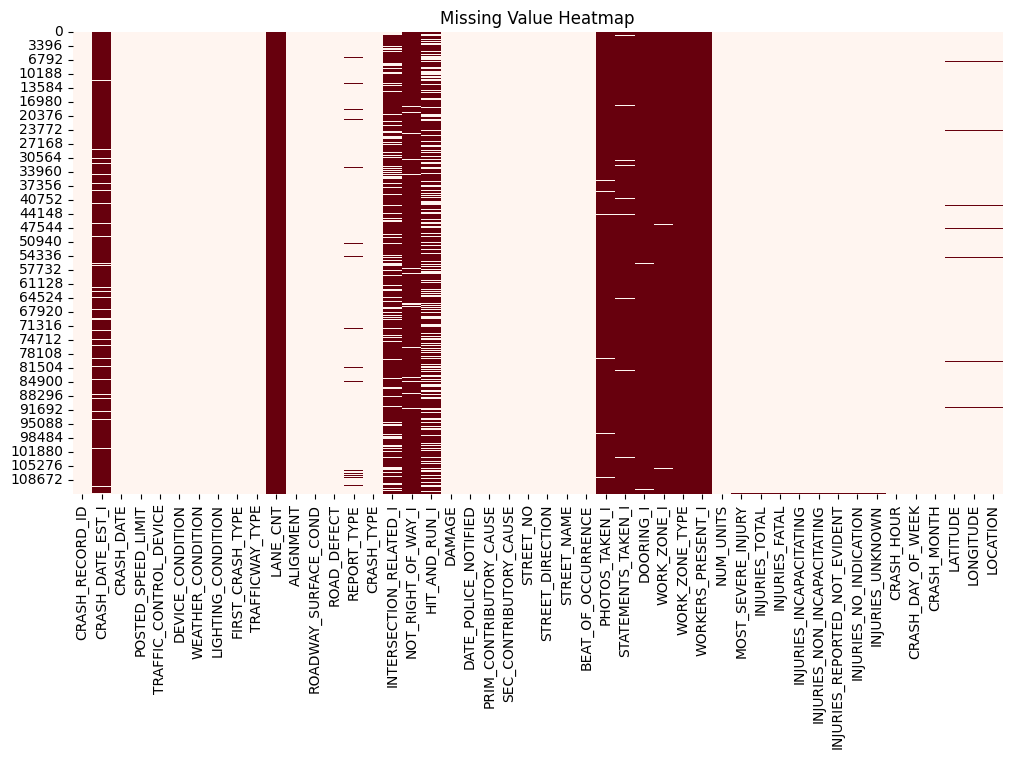

In [ ]:
# Missing Values

print("\nMissing Values (% per column)")
missing_pct = (df.isna().mean() * 100).sort_values(ascending=False)
print(missing_pct)

plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), cbar=False, cmap="Reds")
plt.title("Missing Value Heatmap")
plt.show()


 Correlation Matrix


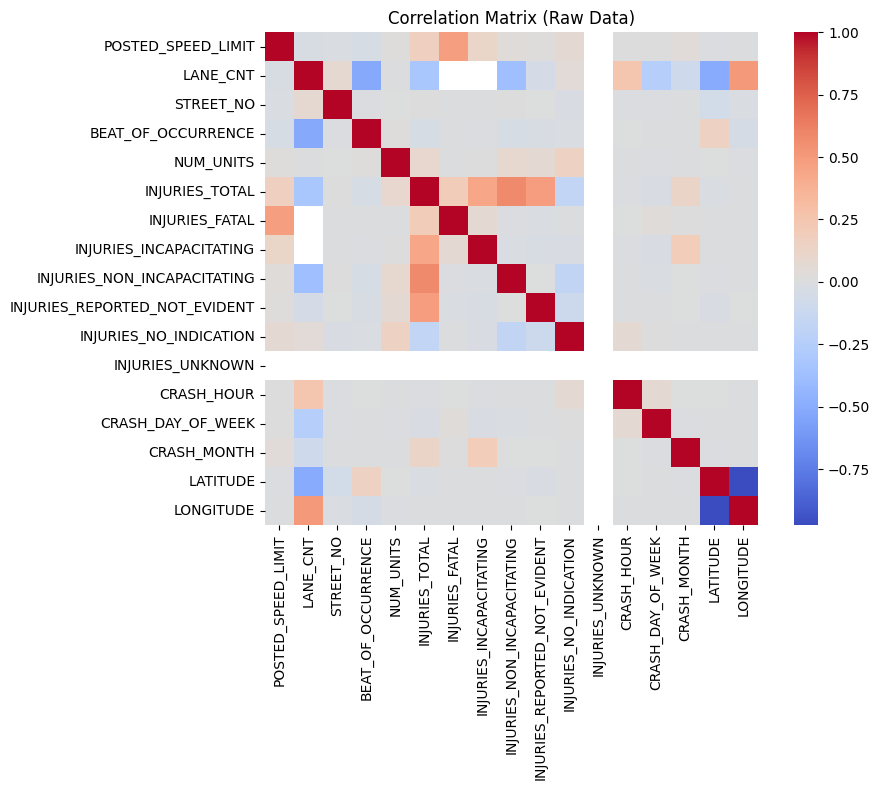

In [ ]:
# Correlation Matrix - RAW DATA

print(" Correlation Matrix")

numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns.tolist()

if len(numeric_cols) > 1:
    corr_matrix = df[numeric_cols].corr()

    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=False, cmap="coolwarm", square=True)
    plt.title("Correlation Matrix (Raw Data)")
    plt.tight_layout()
    plt.show()
else:
    print("Not enough numeric columns for a correlation matrix.")



MOST_SEVERE_INJURY Raw Distribution
MOST_SEVERE_INJURY
NO INDICATION OF INJURY     86159
NONINCAPACITATING INJURY    12588
REPORTED, NOT EVIDENT        6735
INCAPACITATING INJURY        5443
FATAL                         873
NaN                           251
Name: count, dtype: int64


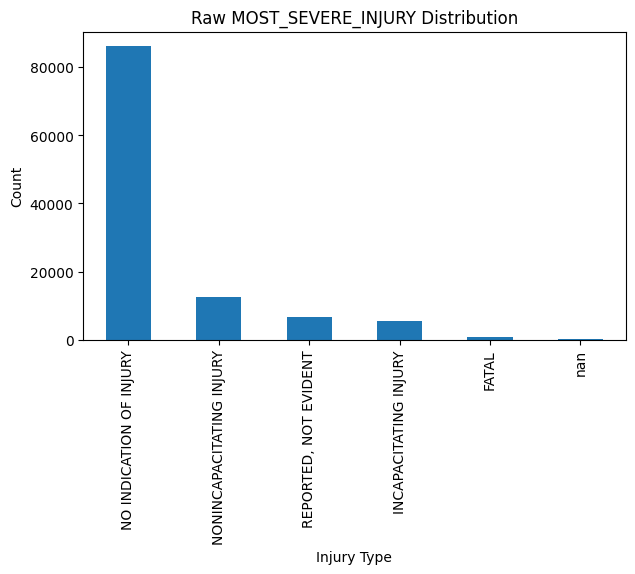

In [ ]:
# Target Distribution (raw MOST_SEVERE_INJURY)
if 'MOST_SEVERE_INJURY' in df.columns:
    print("\nMOST_SEVERE_INJURY Raw Distribution")
    print(df['MOST_SEVERE_INJURY'].value_counts(dropna=False))
    df['MOST_SEVERE_INJURY'].value_counts(dropna=False).plot(kind='bar', figsize=(7,4))
    plt.title("Raw MOST_SEVERE_INJURY Distribution")
    plt.xlabel("Injury Type")
    plt.ylabel("Count")
    plt.xticks(rotation=90)
    plt.show()

/tmp/ipython-input-2527846124.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["CRASH_DATE"] = pd.to_datetime(df["CRASH_DATE"], errors="coerce")


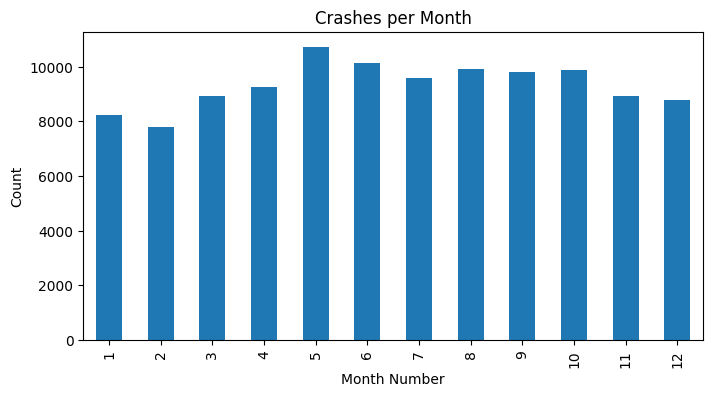

In [ ]:
# Convert CRASH_DATE to datetime once
df["CRASH_DATE"] = pd.to_datetime(df["CRASH_DATE"], errors="coerce")

# Extract useful time features
df["CRASH_HOUR"] = df["CRASH_DATE"].dt.hour
df["CRASH_DAY"] = df["CRASH_DATE"].dt.day_name()
df["CRASH_MONTH"] = df["CRASH_DATE"].dt.month_name()

# Crashes per Month
plt.figure(figsize=(8,4))
(df["CRASH_DATE"].dt.month
    .value_counts()
    .sort_index()
    .plot(kind="bar"))
plt.title("Crashes per Month")
plt.xlabel("Month Number")
plt.ylabel("Count")
plt.show()




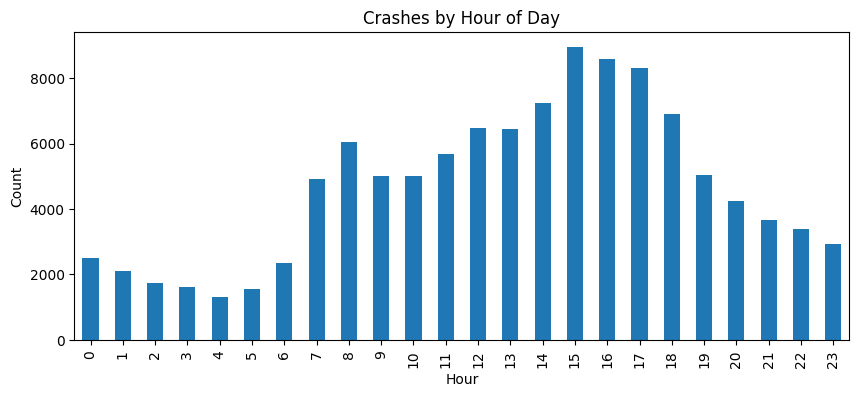

In [ ]:
# Crashes by Hour
plt.figure(figsize=(10,4))
df["CRASH_HOUR"].value_counts().sort_index().plot(kind="bar")
plt.title("Crashes by Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Count")
plt.show()



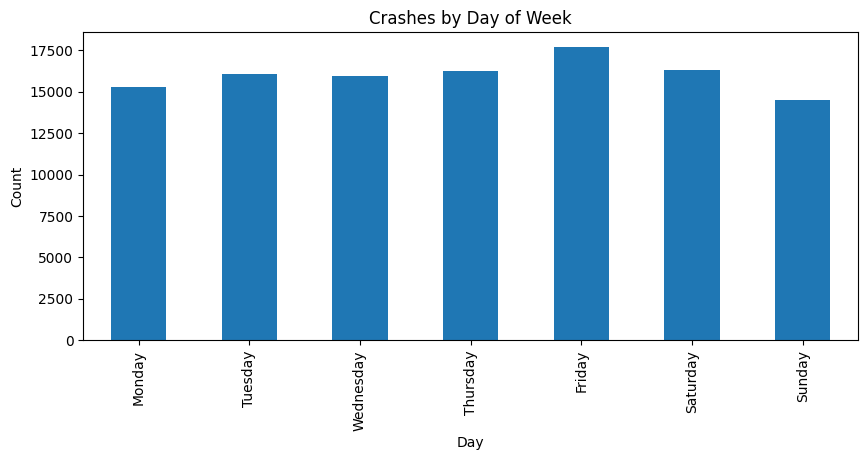

In [ ]:
# Crashes by Day of Week
plt.figure(figsize=(10,4))
df["CRASH_DAY"].value_counts().reindex(
    ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
).plot(kind="bar")
plt.title("Crashes by Day of Week")
plt.xlabel("Day")
plt.ylabel("Count")
plt.show()



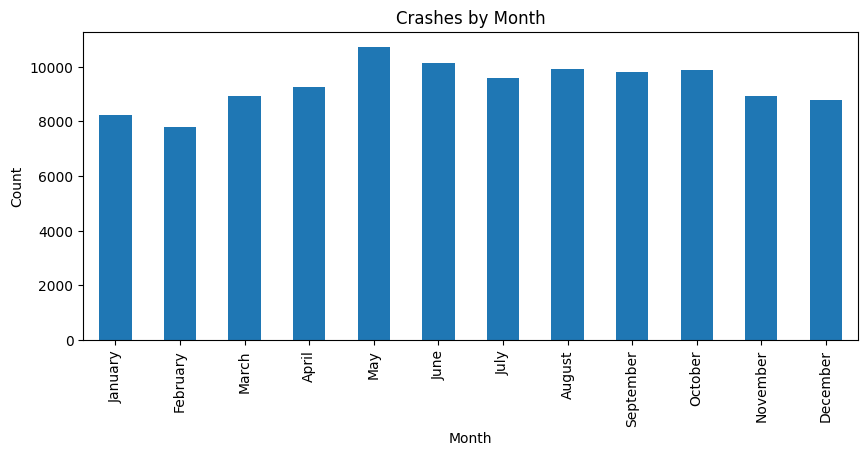

In [ ]:
# Crashes by Month
month_order = [
    "January","February","March","April","May","June",
    "July","August","September","October","November","December"
]

plt.figure(figsize=(10,4))
df["CRASH_MONTH"].value_counts().reindex(month_order).plot(kind="bar")
plt.title("Crashes by Month")
plt.xlabel("Month")
plt.ylabel("Count")
plt.show()

 WEATHER_CONDITION Distribution
WEATHER_CONDITION
CLEAR                       87710
RAIN                         9232
UNKNOWN                      8825
CLOUDY/OVERCAST              3151
SNOW                         2118
FREEZING RAIN/DRIZZLE         372
OTHER                         344
FOG/SMOKE/HAZE                155
SLEET/HAIL                     79
BLOWING SNOW                   55
SEVERE CROSS WIND GATE          7
BLOWING SAND, SOIL, DIRT        1
Name: count, dtype: int64


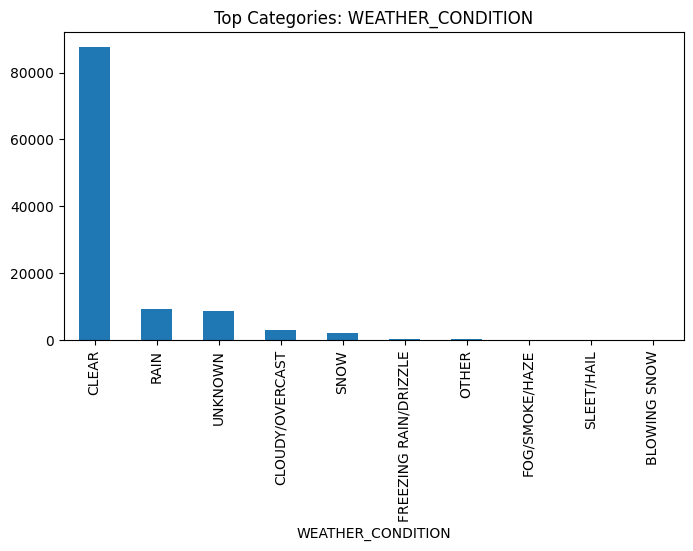

 ROADWAY_SURFACE_COND Distribution
ROADWAY_SURFACE_COND
DRY                81491
UNKNOWN            14690
WET                13124
SNOW OR SLUSH       1981
ICE                  409
OTHER                327
SAND, MUD, DIRT       27
Name: count, dtype: int64


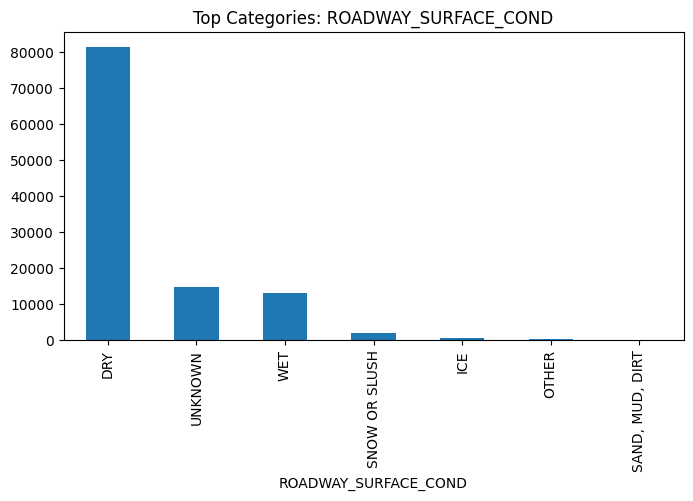

 LIGHTING_CONDITION Distribution
LIGHTING_CONDITION
DAYLIGHT                  71018
DARKNESS, LIGHTED ROAD    24049
UNKNOWN                    7092
DARKNESS                   5013
DUSK                       2998
DAWN                       1879
Name: count, dtype: int64


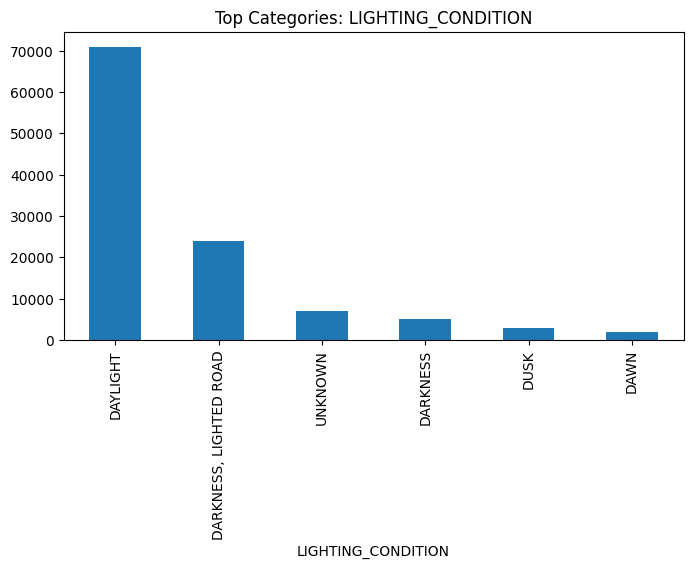

In [ ]:
# Crash Type, Weather, Roadway Surface

for col in ['WEATHER_CONDITION','ROADWAY_SURFACE_COND','LIGHTING_CONDITION']:
    if col in df.columns:
        print(f" {col} Distribution")
        print(df[col].value_counts(dropna=False))

        plt.figure(figsize=(8,4))
        df[col].value_counts().head(10).plot(kind='bar')
        plt.title(f"Top Categories: {col}")
        plt.xticks(rotation=90)
        plt.show()

## Data Cleaning & Handling

In [ ]:
# CHECK RAW TARGET COLUMN
if 'MOST_SEVERE_INJURY' not in df.columns:
    raise ValueError("Expected column 'MOST_SEVERE_INJURY' not found in dataset.")


NEW TARGET VALUE COUNTS (INCLUDING NaN)
INJURY_SEVERITY
No Injury    86159
Minor        19323
Severe        6316
NaN            251
Name: count, dtype: int64

Dropped 251 rows with unknown/NaN INJURY_SEVERITY.
TARGET DISTRIBUTION AFTER DROPPING UNKNOWN
INJURY_SEVERITY
No Injury    86159
Minor        19323
Severe        6316
Name: count, dtype: int64

Target distribution (%):
INJURY_SEVERITY
No Injury    77.07
Minor        17.28
Severe        5.65
Name: proportion, dtype: float64


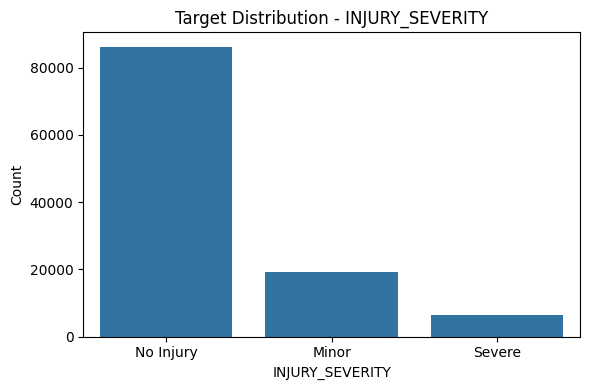

In [ ]:
# CREATE CLEAN TARGET: INJURY_SEVERITY
#   FATAL, INCAPACITATING INJURY              - 'Severe'
#   NONINCAPACITATING INJURY, REPORTED, NOT EVIDENT -'Minor'
#   NO INDICATION OF INJURY                   - 'No Injury'
#   Anything else / NaN                       - NaN

severe_vals = {
    'FATAL',
    'INCAPACITATING INJURY'
}
minor_vals = {
    'NONINCAPACITATING INJURY',
    'REPORTED, NOT EVIDENT'
}
no_injury_vals = {
    'NO INDICATION OF INJURY'
}

def map_injury_severity(raw):
    if pd.isna(raw):
        return np.nan
    t = str(raw).strip().upper()
    if t in severe_vals:
        return 'Severe'
    if t in minor_vals:
        return 'Minor'
    if t in no_injury_vals:
        return 'No Injury'
    # Unknown / unexpected codes -> mark as NaN so we treat explicitly
    return np.nan

df['INJURY_SEVERITY'] = df['MOST_SEVERE_INJURY'].apply(map_injury_severity)

print("\nNEW TARGET VALUE COUNTS (INCLUDING NaN)")
print(df['INJURY_SEVERITY'].value_counts(dropna=False))


# DROP ROWS WITH UNKNOWN / NaN SEVERITY


before = df.shape[0]
df = df.dropna(subset=['INJURY_SEVERITY']).copy()
after = df.shape[0]

print(f"\nDropped {before - after} rows with unknown/NaN INJURY_SEVERITY.")
print("TARGET DISTRIBUTION AFTER DROPPING UNKNOWN")
print(df['INJURY_SEVERITY'].value_counts())
print("\nTarget distribution (%):")
print((df['INJURY_SEVERITY'].value_counts(normalize=True) * 100).round(2))

# 3. Target distribution plot (visual check)
plt.figure(figsize=(6, 4))
sns.countplot(
    x=df['INJURY_SEVERITY'],
    order=['No Injury', 'Minor', 'Severe']
)
plt.title("Target Distribution - INJURY_SEVERITY")
plt.xlabel("INJURY_SEVERITY")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

In [ ]:
#  DROP HIGH-MISSING COLUMNS
print("\n Dropping unusable columns + adding engineered features ")

# 1) DROP COLUMNS WITH > 50% MISSING (SAFE)

high_missing_cols = [
    'LANE_CNT','WORKERS_PRESENT_I','WORK_ZONE_TYPE','DOORING_I',
    'WORK_ZONE_I','PHOTOS_TAKEN_I','STATEMENTS_TAKEN_I','NOT_RIGHT_OF_WAY_I',
    'CRASH_DATE_EST_I','INTERSECTION_RELATED_I','HIT_AND_RUN_I'
]

df = df.drop(columns=[c for c in high_missing_cols if c in df.columns])

print(f"Dropped {len(high_missing_cols)} columns with >50% missing.")



 Dropping unusable columns + adding engineered features 
Dropped 11 columns with >50% missing.


In [ ]:

# 2) DROP INJURY COUNT COLUMNS (LEAKAGE PREVENTION)


injury_cols = [
    'INJURIES_TOTAL','INJURIES_FATAL','INJURIES_INCAPACITATING',
    'INJURIES_NON_INCAPACITATING','INJURIES_REPORTED_NOT_EVIDENT',
    'INJURIES_NO_INDICATION','INJURIES_UNKNOWN'
]

df = df.drop(columns=[c for c in injury_cols if c in df.columns])

print(f"Dropped {len(injury_cols)} injury columns to prevent data leakage.")



Dropped 7 injury columns to prevent data leakage.


In [ ]:

# 3) FEATURE ENGINEERING FROM CRASH_DATE

df['CRASH_DATE'] = pd.to_datetime(df['CRASH_DATE'], errors='coerce')
df = df.dropna(subset=['CRASH_DATE']).copy()

df['CRASH_HOUR_NEW'] = df['CRASH_DATE'].dt.hour
df['CRASH_DAY_OF_WEEK_NEW'] = df['CRASH_DATE'].dt.dayofweek
df['CRASH_MONTH_NEW'] = df['CRASH_DATE'].dt.month

# Time-of-day bucket
def time_of_day(h):
    if 5 <= h < 12: return 'Morning'
    if 12 <= h < 17: return 'Afternoon'
    if 17 <= h < 21: return 'Evening'
    return 'Night'

df['TIME_OF_DAY'] = df['CRASH_HOUR_NEW'].apply(time_of_day)

# Weekend flag
df['IS_WEEKEND'] = df['CRASH_DAY_OF_WEEK_NEW'].isin([5,6]).astype(int)

# Cyclical encoding
df['HOUR_SIN'] = np.sin(2*np.pi*df['CRASH_HOUR_NEW']/24)
df['HOUR_COS'] = np.cos(2*np.pi*df['CRASH_HOUR_NEW']/24)

# Speed flag
df['HIGH_SPEED_ZONE'] = (df['POSTED_SPEED_LIMIT'] > 40).astype(int)

print("\nFeature engineering completed.")

print("\nCurrent shape after cleaning + features:", df.shape)
print("Columns now:", df.columns.tolist())



Feature engineering completed.

Current shape after cleaning + features: (111798, 40)
Columns now: ['CRASH_RECORD_ID', 'CRASH_DATE', 'POSTED_SPEED_LIMIT', 'TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION', 'WEATHER_CONDITION', 'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE', 'TRAFFICWAY_TYPE', 'ALIGNMENT', 'ROADWAY_SURFACE_COND', 'ROAD_DEFECT', 'REPORT_TYPE', 'CRASH_TYPE', 'DAMAGE', 'DATE_POLICE_NOTIFIED', 'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE', 'STREET_NO', 'STREET_DIRECTION', 'STREET_NAME', 'BEAT_OF_OCCURRENCE', 'NUM_UNITS', 'MOST_SEVERE_INJURY', 'CRASH_HOUR', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH', 'LATITUDE', 'LONGITUDE', 'LOCATION', 'CRASH_DAY', 'INJURY_SEVERITY', 'CRASH_HOUR_NEW', 'CRASH_DAY_OF_WEEK_NEW', 'CRASH_MONTH_NEW', 'TIME_OF_DAY', 'IS_WEEKEND', 'HOUR_SIN', 'HOUR_COS', 'HIGH_SPEED_ZONE']



Correlation Matrix
Numeric columns included in correlation: ['POSTED_SPEED_LIMIT', 'STREET_NO', 'BEAT_OF_OCCURRENCE', 'NUM_UNITS', 'CRASH_HOUR', 'CRASH_DAY_OF_WEEK', 'LATITUDE', 'LONGITUDE', 'CRASH_HOUR_NEW', 'CRASH_DAY_OF_WEEK_NEW', 'CRASH_MONTH_NEW', 'IS_WEEKEND', 'HOUR_SIN', 'HOUR_COS', 'HIGH_SPEED_ZONE']


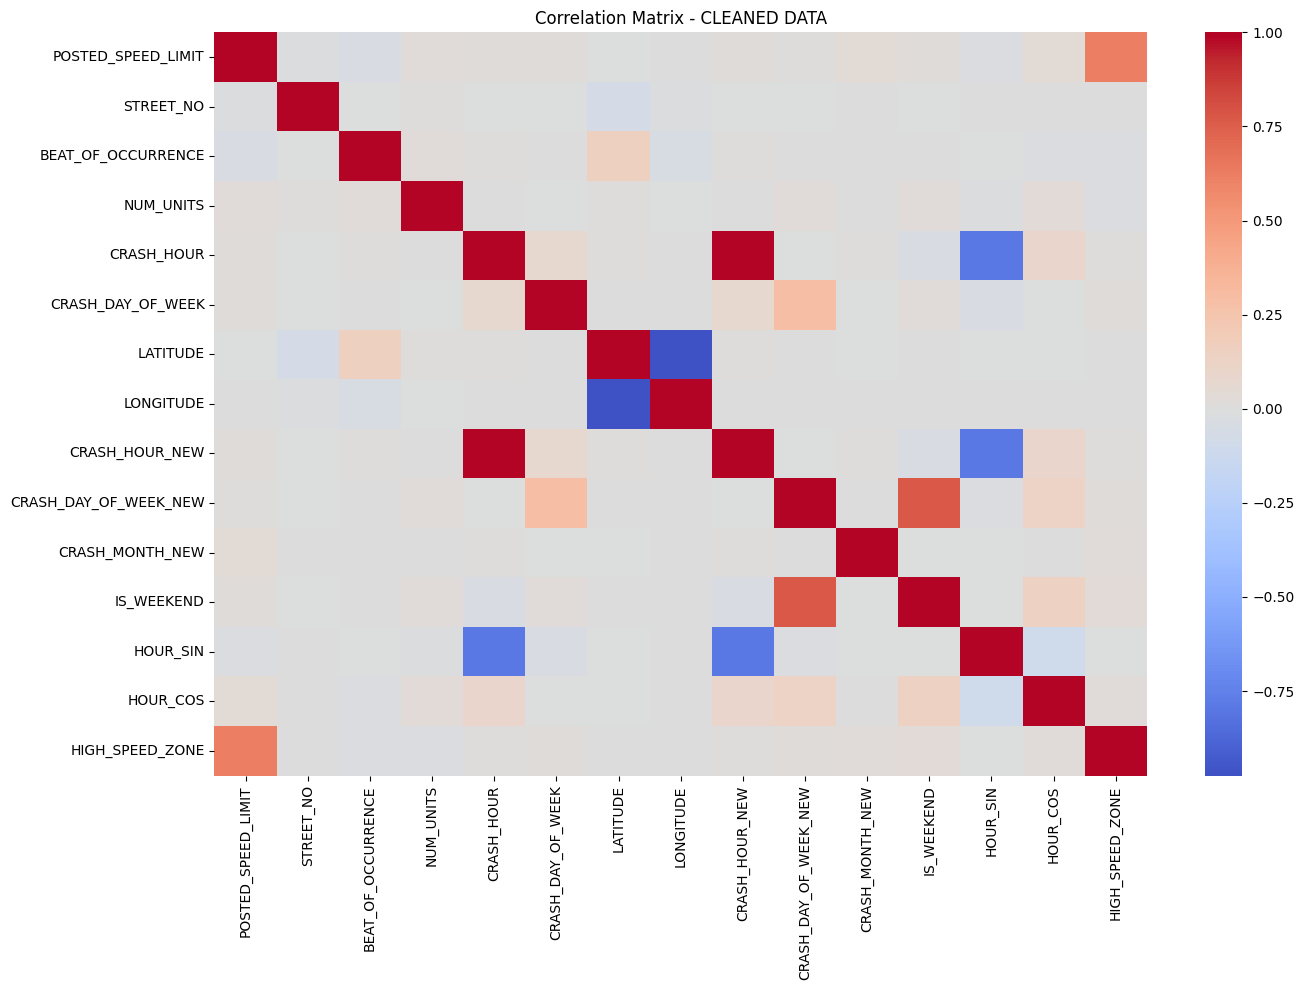

In [ ]:
# CORRELATION HEATMAP (CLEANED DATA )

print("\nCorrelation Matrix")

# Select numeric columns only
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()

print(f"Numeric columns included in correlation: {num_cols}")

# Compute correlation matrix
corr_matrix = df[num_cols].corr()

# Plot heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(
    corr_matrix,
    annot=False,
    cmap='coolwarm',
    center=0
)
plt.title("Correlation Matrix - CLEANED DATA")
plt.tight_layout()
plt.show()


In [ ]:
# FEATURE SELECTION + TRAIN/TEST SPLIT

print("\nSelecting clean features and splitting data")
# 1. DROP COLUMNS WE DO NOT USE AS FEATURES

drop_cols = [
    'CRASH_RECORD_ID',
    'LOCATION',
    'DATE_POLICE_NOTIFIED',
    'DAMAGE',
    'STREET_NAME',
    'STREET_DIRECTION',
    'STREET_NO',
    'CRASH_HOUR',
    'CRASH_DAY_OF_WEEK',
    'CRASH_MONTH',

    # ORIGINAL LABEL — NOT A FEATURE
    'MOST_SEVERE_INJURY'
]

df = df.drop(columns=[c for c in drop_cols if c in df.columns])

print(f"Dropped {len(drop_cols)} unwanted columns.")

# 2. FEATURES (X) AND TARGET (y)

y = df["INJURY_SEVERITY"]
X = df.drop(columns=["INJURY_SEVERITY"])

print("\nShapes:")
print("X:", X.shape)
print("y:", y.shape)

# 3. TRAIN/TEST SPLIT WITH STRATIFICATION

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.20,
    random_state=42,
    stratify=y
)

print("\nSplit completed.")
print("Train shape:", X_train.shape, "Test shape:", X_test.shape)



Selecting clean features and splitting data
Dropped 11 unwanted columns.

Shapes:
X: (111798, 28)
y: (111798,)

Split completed.
Train shape: (89438, 28) Test shape: (22360, 28)


In [ ]:
# BUILD PREPROCESSING PIPELINE (TRAIN-ONLY)

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

print("\nBuilding preprocessing pipeline")

# 1) IDENTIFY NUMERIC & CATEGORICAL COLUMNS

numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X_train.select_dtypes(include=['object']).columns.tolist()

print("\nNumeric columns:", numeric_features)
print("\nCategorical columns:", categorical_features)

# 2) NUMERIC PIPELINE
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median"))
])

# 3) CATEGORICAL PIPELINE

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
])

# 4) COMBINE INTO COLUMNTRANSFORMER

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ],
    remainder="drop"
)

print("\nPreprocessing pipeline created successfully.")

# 5) FIT PIPELINE ON TRAINING DATA ONLY

print("\nFitting preprocessing pipeline on TRAIN data only")
preprocessor.fit(X_train)

print("\nTransforming training and test sets")
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

print("\nShapes after preprocessing:")
print("X_train_processed:", X_train_processed.shape)
print("X_test_processed:", X_test_processed.shape)



Building preprocessing pipeline

Numeric columns: ['POSTED_SPEED_LIMIT', 'BEAT_OF_OCCURRENCE', 'NUM_UNITS', 'LATITUDE', 'LONGITUDE', 'IS_WEEKEND', 'HOUR_SIN', 'HOUR_COS', 'HIGH_SPEED_ZONE']

Categorical columns: ['TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION', 'WEATHER_CONDITION', 'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE', 'TRAFFICWAY_TYPE', 'ALIGNMENT', 'ROADWAY_SURFACE_COND', 'ROAD_DEFECT', 'REPORT_TYPE', 'CRASH_TYPE', 'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE', 'CRASH_DAY', 'TIME_OF_DAY']

Preprocessing pipeline created successfully.

Fitting preprocessing pipeline on TRAIN data only

Transforming training and test sets

Shapes after preprocessing:
X_train_processed: (89438, 201)
X_test_processed: (22360, 201)


In [ ]:

# OUTLIER HANDLING (TRAIN-ONLY)


print("\nOutlier handling (quantile capping)")

# Get numeric columns used in the pipeline
num_cols = numeric_features

# Store clipping thresholds
clip_bounds = {}

# Compute thresholds from TRAIN ONLY
for col in num_cols:
    lower = X_train[col].quantile(0.005)
    upper = X_train[col].quantile(0.995)
    clip_bounds[col] = (lower, upper)

print("\nClip bounds calculated for numeric columns:")
for k, v in clip_bounds.items():
    print(f"{k}: {v}")

# Apply clipping to X_train and X_test
X_train_clipped = X_train.copy()
X_test_clipped = X_test.copy()

for col, (low, high) in clip_bounds.items():
    X_train_clipped[col] = X_train_clipped[col].clip(low, high)
    X_test_clipped[col] = X_test_clipped[col].clip(low, high)

print("\nClipping applied to train and test sets.")

# Now re run preprocessing on clipped data
X_train_processed = preprocessor.transform(X_train_clipped)
X_test_processed = preprocessor.transform(X_test_clipped)

print("\nShapes after outlier handling + preprocessing:")
print("X_train_processed:", X_train_processed.shape)
print("X_test_processed:", X_test_processed.shape)



Outlier handling (quantile capping)

Clip bounds calculated for numeric columns:
POSTED_SPEED_LIMIT: (np.float64(10.0), np.float64(85.0))
BEAT_OF_OCCURRENCE: (np.float64(112.0), np.float64(2534.0))
NUM_UNITS: (np.float64(1.0), np.float64(4.0))
LATITUDE: (np.float64(41.65958318), np.float64(42.0141123466))
LONGITUDE: (np.float64(-87.8368473744), np.float64(-87.54024602))
IS_WEEKEND: (np.float64(0.0), np.float64(1.0))
HOUR_SIN: (np.float64(-1.0), np.float64(1.0))
HOUR_COS: (np.float64(-1.0), np.float64(1.0))
HIGH_SPEED_ZONE: (np.float64(0.0), np.float64(1.0))

Clipping applied to train and test sets.

Shapes after outlier handling + preprocessing:
X_train_processed: (89438, 201)
X_test_processed: (22360, 201)


## TRAINING MODELS



RandomForest Results
              precision    recall  f1-score   support

       Minor       0.61      0.80      0.69      3865
   No Injury       0.94      0.92      0.93     17232
      Severe       0.80      0.27      0.41      1263

    accuracy                           0.86     22360
   macro avg       0.78      0.66      0.68     22360
weighted avg       0.88      0.86      0.86     22360


RandomForest Confusion Matrix):
[[15890  1310    32]
 [  725  3086    54]
 [  227   692   344]]

RandomForest – Global Metrics
Accuracy:           0.8640
Balanced Accuracy:  0.6643
Macro F1-score:     0.6761
Weighted F1-score:  0.8609


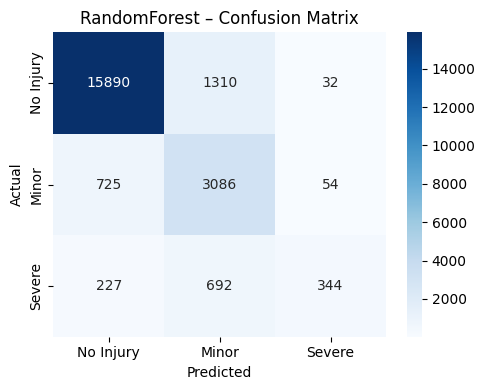

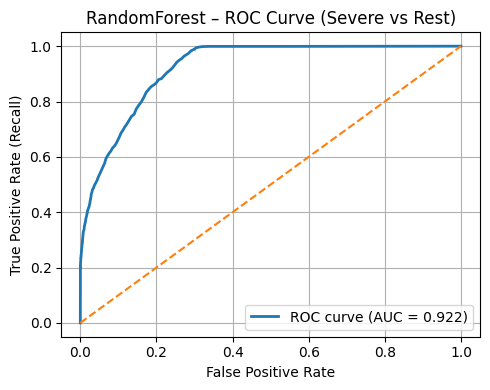

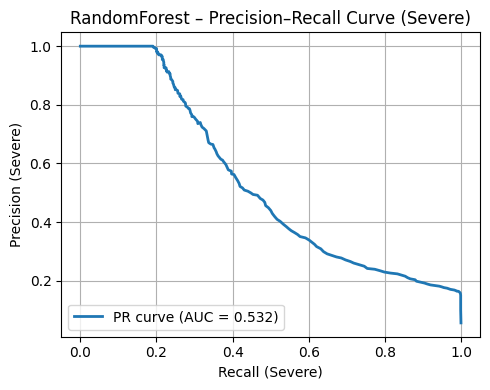

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score,
    balanced_accuracy_score,
    f1_score,
    roc_auc_score,
    roc_curve,
    precision_recall_curve,
    average_precision_score
)
from sklearn.preprocessing import LabelEncoder

# MODEL 1: RANDOM FOREST

rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    class_weight="balanced",
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train_processed, y_train)
rf_preds = rf.predict(X_test_processed)

print("\nRandomForest Results")
print(classification_report(y_test, rf_preds, zero_division=0))

print("\nRandomForest Confusion Matrix):")
cm = confusion_matrix(y_test, rf_preds, labels=['No Injury', 'Minor', 'Severe'])
print(cm)

# 1)Global Metrics

acc = accuracy_score(y_test, rf_preds)
bal_acc = balanced_accuracy_score(y_test, rf_preds)
macro_f1 = f1_score(y_test, rf_preds, average="macro", zero_division=0)
weighted_f1 = f1_score(y_test, rf_preds, average="weighted", zero_division=0)

print("\nRandomForest – Global Metrics")
print(f"Accuracy:           {acc:.4f}")
print(f"Balanced Accuracy:  {bal_acc:.4f}")
print(f"Macro F1-score:     {macro_f1:.4f}")
print(f"Weighted F1-score:  {weighted_f1:.4f}")

# 2) Confusion Matrix Heatmaps
cm_norm = confusion_matrix(
    y_test,
    rf_preds,
    labels=['No Injury', 'Minor', 'Severe'],
    normalize="true"
)

plt.figure(figsize=(5, 4))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=['No Injury', 'Minor', 'Severe'],
    yticklabels=['No Injury', 'Minor', 'Severe']
)
plt.title("RandomForest – Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# 3) Severe vs Rest – ROC & PR Curves

# Probabilities for each class
rf_proba = rf.predict_proba(X_test_processed)

# Index of Severe class
severe_idx = list(rf.classes_).index("Severe")
severe_proba = rf_proba[:, severe_idx]

# Binary ground truth: Severe = 1, others = 0
y_true_severe = (y_test == "Severe").astype(int)

# ROC curve + AUC
fpr, tpr, _ = roc_curve(y_true_severe, severe_proba)
roc_auc = roc_auc_score(y_true_severe, severe_proba)

plt.figure(figsize=(5, 4))
plt.plot(fpr, tpr, lw=2, label=f"ROC curve (AUC = {roc_auc:.3f})")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("RandomForest – ROC Curve (Severe vs Rest)")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

# PR curve + PR-AUC
precision, recall, _ = precision_recall_curve(y_true_severe, severe_proba)
pr_auc = average_precision_score(y_true_severe, severe_proba)

plt.figure(figsize=(5, 4))
plt.plot(recall, precision, lw=2, label=f"PR curve (AUC = {pr_auc:.3f})")
plt.xlabel("Recall (Severe)")
plt.ylabel("Precision (Severe)")
plt.title("RandomForest – Precision–Recall Curve (Severe)")
plt.legend(loc="lower left")
plt.grid(True)
plt.tight_layout()
plt.show()


##  XGBOOST


Encoding labels for XGBoost
Label mapping: {'Minor': np.int64(0), 'No Injury': np.int64(1), 'Severe': np.int64(2)}
Class Weights (encoded): {1: 1.2975756960262306, 0: 5.785871393453228, 2: 17.69998020977637}

XGBoost Results
              precision    recall  f1-score   support

       Minor       0.57      0.84      0.68      3865
   No Injury       0.99      0.87      0.92     17232
      Severe       0.38      0.52      0.44      1263

    accuracy                           0.84     22360
   macro avg       0.65      0.74      0.68     22360
weighted avg       0.89      0.84      0.86     22360


XGBoost Confusion Matrix:
[[14907  1830   495]
 [   79  3236   550]
 [   22   590   651]]

XGBoost – Global Metrics
Accuracy:           0.8405
Balanced Accuracy:  0.7393
Macro F1-score:     0.6815
Weighted F1-score:  0.8550


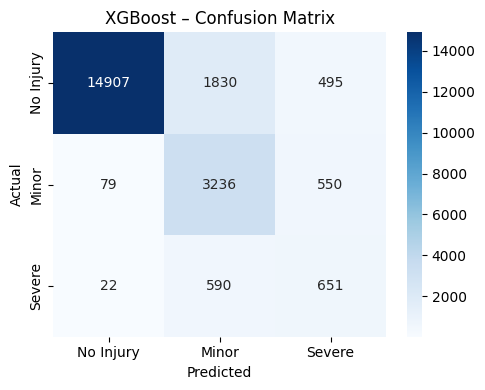

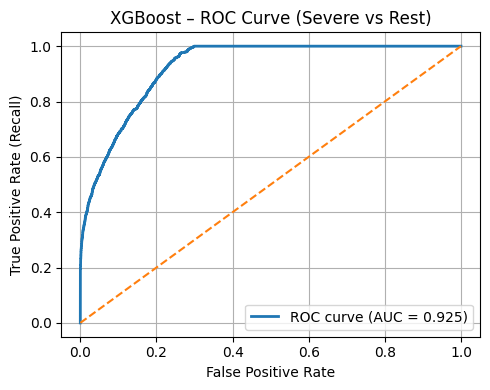

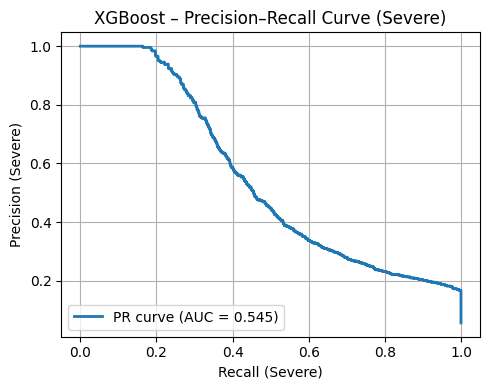

In [ ]:

# MODEL 2 : XGBOOST

import xgboost as xgb
print("\nEncoding labels for XGBoost")

le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)

print("Label mapping:", dict(zip(le.classes_, le.transform(le.classes_))))

# Compute class weights from encoded labels
class_counts = pd.Series(y_train_enc).value_counts()
total = len(y_train_enc)
class_weights = {cls: total / cnt for cls, cnt in class_counts.items()}
print("Class Weights (encoded):", class_weights)

# Map each training sample to its class weight
sample_weights = pd.Series(y_train_enc).map(class_weights)

xgb_model = xgb.XGBClassifier(
    objective='multi:softprob',
    num_class=3,
    eval_metric='mlogloss',
    learning_rate=0.08,
    n_estimators=350,
    max_depth=7,
    subsample=0.8,
    colsample_bytree=0.8,
    tree_method='hist',
    random_state=42
)

xgb_model.fit(
    X_train_processed,
    y_train_enc,
    sample_weight=sample_weights
)

# Predict encoded labels
xgb_pred_enc = xgb_model.predict(X_test_processed)

# Convert back to original string labels
xgb_preds = le.inverse_transform(xgb_pred_enc)

print("\nXGBoost Results")
print(classification_report(y_test, xgb_preds, zero_division=0))

print("\nXGBoost Confusion Matrix:")
cm_xgb = confusion_matrix(y_test, xgb_preds, labels=['No Injury', 'Minor', 'Severe'])
print(cm_xgb)


# 1) Global Metrics
acc_xgb = accuracy_score(y_test, xgb_preds)
bal_acc_xgb = balanced_accuracy_score(y_test, xgb_preds)
macro_f1_xgb = f1_score(y_test, xgb_preds, average="macro", zero_division=0)
weighted_f1_xgb = f1_score(y_test, xgb_preds, average="weighted", zero_division=0)

print("\nXGBoost – Global Metrics")
print(f"Accuracy:           {acc_xgb:.4f}")
print(f"Balanced Accuracy:  {bal_acc_xgb:.4f}")
print(f"Macro F1-score:     {macro_f1_xgb:.4f}")
print(f"Weighted F1-score:  {weighted_f1_xgb:.4f}")

# 2) Confusion Matrix Heatmaps
cm_xgb_norm = confusion_matrix(
    y_test,
    xgb_preds,
    labels=['No Injury', 'Minor', 'Severe'],
    normalize="true"
)

plt.figure(figsize=(5, 4))
sns.heatmap(cm_xgb, annot=True, fmt="d",
            cmap="Blues",
            xticklabels=['No Injury', 'Minor', 'Severe'],
            yticklabels=['No Injury', 'Minor', 'Severe'])
plt.title("XGBoost – Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# 3) Severe vs Rest – ROC & PR Curves

xgb_proba = xgb_model.predict_proba(X_test_processed)

# Index for Severe
severe_idx_xgb = list(le.classes_).index("Severe")
severe_proba_xgb = xgb_proba[:, severe_idx_xgb]

# Binary labels (Severe = 1, others = 0)
y_true_severe_xgb = (y_test == "Severe").astype(int)

# ROC Curve
fpr_xgb, tpr_xgb, _ = roc_curve(y_true_severe_xgb, severe_proba_xgb)
roc_auc_xgb = roc_auc_score(y_true_severe_xgb, severe_proba_xgb)

plt.figure(figsize=(5,4))
plt.plot(fpr_xgb, tpr_xgb, lw=2, label=f"ROC curve (AUC = {roc_auc_xgb:.3f})")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("XGBoost – ROC Curve (Severe vs Rest)")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

# PR Curve
precision_xgb, recall_xgb, _ = precision_recall_curve(
    y_true_severe_xgb,
    severe_proba_xgb
)
pr_auc_xgb = average_precision_score(y_true_severe_xgb, severe_proba_xgb)

plt.figure(figsize=(5,4))
plt.plot(recall_xgb, precision_xgb, lw=2, label=f"PR curve (AUC = {pr_auc_xgb:.3f})")
plt.xlabel("Recall (Severe)")
plt.ylabel("Precision (Severe)")
plt.title("XGBoost – Precision–Recall Curve (Severe)")
plt.legend(loc="lower left")
plt.grid(True)
plt.tight_layout()
plt.show()



Tuned RandomForest (Severe-focused + Threshold Tuning)

Tuned RandomForest Results (Argmax) 
              precision    recall  f1-score   support

       Minor       0.55      0.91      0.68      3865
   No Injury       1.00      0.85      0.92     17232
      Severe       0.46      0.44      0.45      1263

    accuracy                           0.84     22360
   macro avg       0.67      0.73      0.68     22360
weighted avg       0.89      0.84      0.85     22360


Confusion Matrix (Tuned RandomForest, Argmax):
[[14713  2219   300]
 [    8  3516   341]
 [    2   711   550]]

Severe-focused threshold tuning (Tuned RF)

Best Severe threshold (Tuned RF, by F1): 0.4240
Best Severe F1 (Tuned RF): 0.4770

Tuned RandomForest Results with Optimal Severe Threshold 
              precision    recall  f1-score   support

       Minor       0.55      0.91      0.68      3865
   No Injury       1.00      0.85      0.92     17232
      Severe       0.46      0.45      0.45      1263

    accur

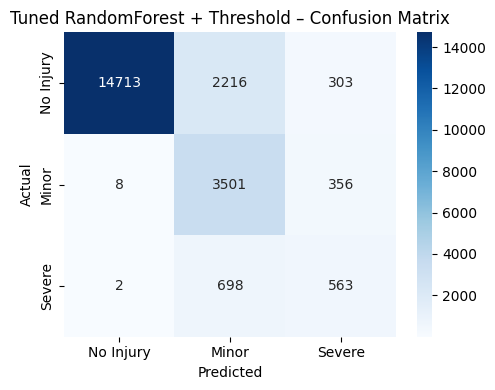


PR-AUC (Severe, Tuned RF): 0.5278
ROC-AUC (Severe, Tuned RF): 0.9227


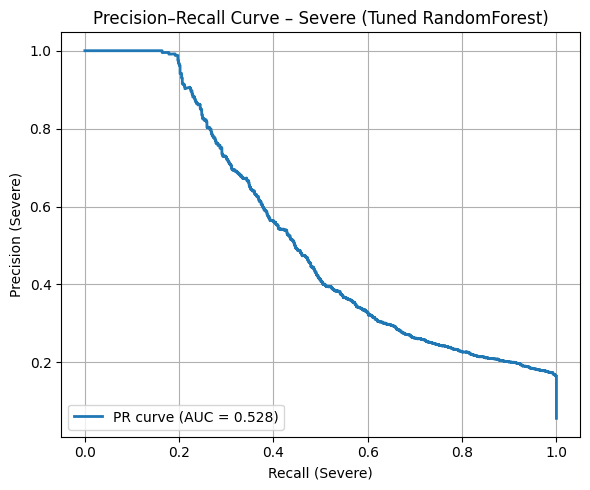

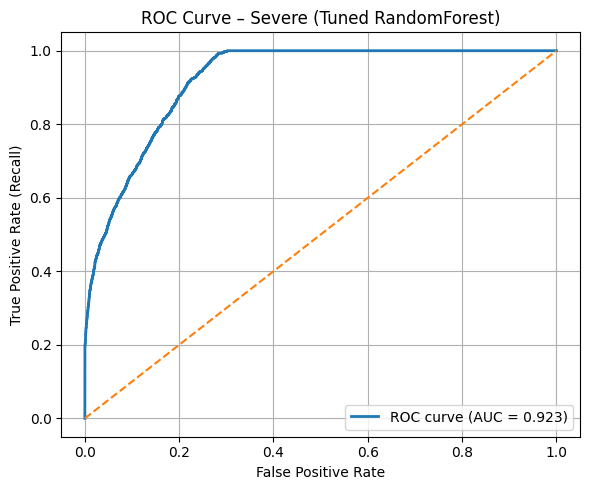

In [ ]:

# MODEL 3 : Tuned RandomForest (Severe-focused) + Threshold Tuning

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    precision_recall_curve,
    average_precision_score,
    roc_auc_score,
    roc_curve,
    accuracy_score,
    balanced_accuracy_score,
    f1_score
)

print("\nTuned RandomForest (Severe-focused + Threshold Tuning)")

# 1) Tuned RandomForest with custom class weights (Severe-focused)

# Custom class weights:
# - No Injury: 1.0 (baseline)
# - Minor:     3.0 (more important than No Injury)
# - Severe:    8.0 (much more important)
rf_tuned = RandomForestClassifier(
    n_estimators=500,
    max_depth=12,
    min_samples_leaf=10,    # better generalization
    max_features="sqrt",
    class_weight={
        "No Injury": 1.0,
        "Minor": 3.0,
        "Severe": 8.0
    },
    random_state=42,
    n_jobs=-1
)

rf_tuned.fit(X_train_processed, y_train)

# Standard argmax predictions
rf_tuned_preds = rf_tuned.predict(X_test_processed)

print("\nTuned RandomForest Results (Argmax) ")
print(classification_report(y_test, rf_tuned_preds, zero_division=0))

print("\nConfusion Matrix (Tuned RandomForest, Argmax):")
print(confusion_matrix(y_test, rf_tuned_preds, labels=["No Injury", "Minor", "Severe"]))

# 2) Optimal Severe Threshold for Tuned RandomForest


print("\nSevere-focused threshold tuning (Tuned RF)")

# Predicted probabilities from tuned RF
proba_rf_tuned = rf_tuned.predict_proba(X_test_processed)

# Find index of "Severe" in RF's class ordering
severe_idx_rf = list(rf_tuned.classes_).index("Severe")
severe_proba_rf = proba_rf_tuned[:, severe_idx_rf]

# True labels: Severe vs Rest (binary)
y_true_binary_rf = (y_test == "Severe").astype(int)

# Precision–Recall curve for Severe
precision_rf, recall_rf, thresholds_rf = precision_recall_curve(
    y_true_binary_rf,
    severe_proba_rf
)

# F1 for each threshold
f1_scores_rf = (2 * precision_rf * recall_rf) / (precision_rf + recall_rf + 1e-9)
best_idx_rf = np.argmax(f1_scores_rf)
best_thr_rf = thresholds_rf[best_idx_rf]
best_f1_rf = f1_scores_rf[best_idx_rf]

print(f"\nBest Severe threshold (Tuned RF, by F1): {best_thr_rf:.4f}")
print(f"Best Severe F1 (Tuned RF): {best_f1_rf:.4f}")

# Baseline argmax predictions from above
rf_tuned_argmax = rf_tuned_preds

# Apply Severe threshold override (same logic, just evaluated nicely)
rf_tuned_opt = []
for i, p_sev in enumerate(severe_proba_rf):
    if p_sev >= best_thr_rf:
        rf_tuned_opt.append("Severe")
    else:
        rf_tuned_opt.append(rf_tuned_argmax[i])


# 3) Evaluation of Final Thresholded Model


print("\nTuned RandomForest Results with Optimal Severe Threshold ")
print(classification_report(y_test, rf_tuned_opt, zero_division=0))

# Confusion matrix (counts)
cm_final = confusion_matrix(y_test, rf_tuned_opt, labels=["No Injury", "Minor", "Severe"])
print("\nConfusion Matrix (Tuned RF + Optimal Severe Threshold):")
print(cm_final)

# Global metrics
acc_final = accuracy_score(y_test, rf_tuned_opt)
bal_acc_final = balanced_accuracy_score(y_test, rf_tuned_opt)
macro_f1_final = f1_score(y_test, rf_tuned_opt, average="macro", zero_division=0)
weighted_f1_final = f1_score(y_test, rf_tuned_opt, average="weighted", zero_division=0)

print("\nMetrics (Tuned RF + Threshold)")
print(f"Accuracy:           {acc_final:.4f}")
print(f"Balanced Accuracy:  {bal_acc_final:.4f}")
print(f"Macro F1-score:     {macro_f1_final:.4f}")
print(f"Weighted F1-score:  {weighted_f1_final:.4f}")

# Normalized confusion matrix
cm_final_norm = confusion_matrix(
    y_test,
    rf_tuned_opt,
    labels=["No Injury", "Minor", "Severe"],
    normalize="true"
)

# Confusion Matrix Heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(
    cm_final,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["No Injury", "Minor", "Severe"],
    yticklabels=["No Injury", "Minor", "Severe"]
)
plt.title("Tuned RandomForest + Threshold – Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()


# 4) Severe-class PR-AUC, ROC-AUC & Curves

# PR-AUC and ROC-AUC for Severe (same severe_proba_rf)
pr_auc_rf = average_precision_score(y_true_binary_rf, severe_proba_rf)
roc_auc_rf = roc_auc_score(y_true_binary_rf, severe_proba_rf)

print(f"\nPR-AUC (Severe, Tuned RF): {pr_auc_rf:.4f}")
print(f"ROC-AUC (Severe, Tuned RF): {roc_auc_rf:.4f}")

# PR curve plot
plt.figure(figsize=(6, 5))
plt.plot(recall_rf, precision_rf, lw=2, label=f"PR curve (AUC = {pr_auc_rf:.3f})")
plt.xlabel("Recall (Severe)")
plt.ylabel("Precision (Severe)")
plt.title("Precision–Recall Curve – Severe (Tuned RandomForest)")
plt.legend(loc="lower left")
plt.grid(True)
plt.tight_layout()
plt.show()

# ROC curve plot
fpr_rf, tpr_rf, _ = roc_curve(y_true_binary_rf, severe_proba_rf)
plt.figure(figsize=(6, 5))
plt.plot(fpr_rf, tpr_rf, lw=2, label=f"ROC curve (AUC = {roc_auc_rf:.3f})")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve – Severe (Tuned RandomForest)")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()



THRESHOLD-TUNED XGBOOST PIPELINE
Train sub shape: (71550, 201) Val shape: (17888, 201)
Original Severe count: 4043, Target Severe after SMOTE: 6064
After SMOTE class distribution: {np.int64(0): np.int64(12366), np.int64(1): np.int64(55141), np.int64(2): np.int64(6064)}
Best Severe threshold on val: 0.250
Val Severe: precision=0.511, recall=0.456, f1=0.482

Finding best threshold for Severe class (SMOTE model)

Best threshold for Severe (by F1, SMOTE model): 0.2383
Best Severe F1 (SMOTE model): 0.4938

XGBoost + SMOTE Results with Optimal Severe Threshold
              precision    recall  f1-score   support

       Minor       0.63      0.70      0.66      3865
   No Injury       0.94      0.92      0.93     17232
      Severe       0.51      0.48      0.49      1263

    accuracy                           0.86     22360
   macro avg       0.70      0.70      0.70     22360
weighted avg       0.87      0.86      0.86     22360


Confusion Matrix (Optimal Threshold, SMOTE model):
[[159

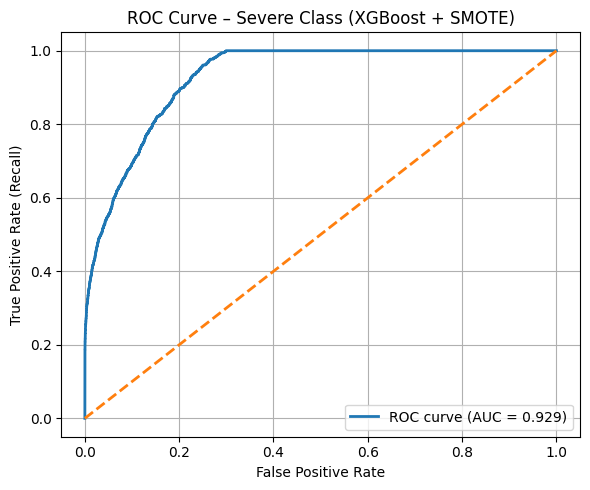

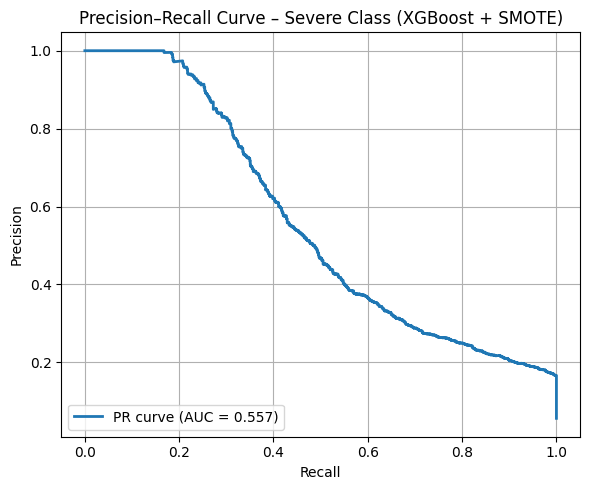


Final XGBoost + SMOTE + Optimal Threshold – Metrics
Accuracy:           0.8610
Balanced Accuracy:  0.7009
Macro F1-score:     0.6972
Weighted F1-score:  0.8628


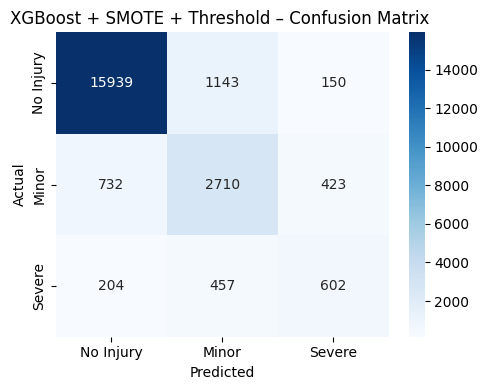

In [ ]:

# MODEL 4  THRESHOLD-TUNED XGBOOST PIPELINE (with SMOTE)

from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    precision_score,
    recall_score,
    f1_score
)
from imblearn.over_sampling import SMOTE
from collections import Counter
import xgboost as xgb

print("\nTHRESHOLD-TUNED XGBOOST PIPELINE")


# 1) Encode labels
y_test_enc  = le.transform(y_test)

#print("Label mapping:", dict(zip(le.classes_, le.transform(le.classes_))))
idx_minor  = le.transform(['Minor'])[0]
idx_noinj  = le.transform(['No Injury'])[0]
idx_severe = le.transform(['Severe'])[0]

# 2) Split TRAIN into (train_sub, val)

X_train_sub, X_val, y_train_sub, y_val = train_test_split(
    X_train_processed,
    y_train_enc,
    test_size=0.2,
    stratify=y_train_enc,
    random_state=42
)

print("Train sub shape:", X_train_sub.shape, "Val shape:", X_val.shape)


# 3) Apply SMOTE ONLY on train_sub (NOT on val, NOT on test)

#print("\nApplying SMOTE on train_sub")

class_counts = Counter(y_train_sub)
#print("Class distribution before SMOTE (encoded):", class_counts)

severe_orig = class_counts[idx_severe]

# Choose a target >= current count
target_severe = int(severe_orig * 1.5)
if target_severe <= severe_orig:
    target_severe = severe_orig + 1

print(f"Original Severe count: {severe_orig}, Target Severe after SMOTE: {target_severe}")

smote = SMOTE(
    sampling_strategy={idx_severe: target_severe},
    random_state=42
)

X_train_smote, y_train_smote = smote.fit_resample(X_train_sub, y_train_sub)
print("After SMOTE class distribution:", dict(zip(*np.unique(y_train_smote, return_counts=True))))

# 4) Train XGBoost on SMOTE-resampled train_sub
#print("\nTraining XGBoost on SMOTE-resampled data")

xgb_smote = xgb.XGBClassifier(
    objective='multi:softprob',
    num_class=3,
    eval_metric='mlogloss',
    learning_rate=0.07,
    n_estimators=400,
    max_depth=7,
    subsample=0.8,
    colsample_bytree=0.8,
    tree_method='hist',
    reg_lambda=1.0,
    reg_alpha=0.0,
    random_state=42
)

xgb_smote.fit(X_train_smote, y_train_smote)


# 5) Tune threshold for Severe on VALIDATION set

#print("\nTuning threshold for Severe on validation set")

proba_val = xgb_smote.predict_proba(X_val)
severe_probs_val = proba_val[:, idx_severe]

is_severe_true_val = (y_val == idx_severe)

best_thr_severe = 0.5
best_f1_severe = 0.0
best_p_severe = 0.0
best_r_severe = 0.0

for thr in np.linspace(0.05, 0.9, 18):
    is_severe_pred = (severe_probs_val >= thr)
    p = precision_score(is_severe_true_val, is_severe_pred, zero_division=0)
    r = recall_score(is_severe_true_val, is_severe_pred, zero_division=0)
    f1 = f1_score(is_severe_true_val, is_severe_pred, zero_division=0)


    if f1 > best_f1_severe:
        best_f1_severe = f1
        best_thr_severe = thr
        best_p_severe = p
        best_r_severe = r

print(f"Best Severe threshold on val: {best_thr_severe:.3f}")
print(f"Val Severe: precision={best_p_severe:.3f}, recall={best_r_severe:.3f}, f1={best_f1_severe:.3f}")

minor_thr = 0.5
# 6) Apply custom thresholds on TEST set

#print("\nEvaluating on TEST set with custom thresholds")

proba_test = xgb_smote.predict_proba(X_test_processed)

y_pred_test_custom = []

for p in proba_test:
    p_minor  = p[idx_minor]
    p_noinj  = p[idx_noinj]
    p_severe = p[idx_severe]

    #  Severe
    if p_severe >= best_thr_severe:
        y_pred_test_custom.append(idx_severe)
    # Minor
    elif p_minor >= minor_thr:
        y_pred_test_custom.append(idx_minor)
    # Else No Injury
    else:
        y_pred_test_custom.append(idx_noinj)

y_pred_test_custom = np.array(y_pred_test_custom)
y_pred_test_labels = le.inverse_transform(y_pred_test_custom)

#print("\nXGBoost + SMOTE + Threshold Tuning (TEST)")
#print(classification_report(y_test, y_pred_test_labels, zero_division=0))
#print("\nConfusion Matrix (labels=[No Injury, Minor, Severe]):")
#print(confusion_matrix(y_test, y_pred_test_labels, labels=['No Injury','Minor','Severe']))

# Find Optimal Threshold for Severe (using SMOTE model)


from sklearn.metrics import (
    precision_recall_curve,
    classification_report,
    confusion_matrix,
    roc_curve,
    roc_auc_score,
    average_precision_score
)

# print("\nFinding best threshold for Severe class (SMOTE model)")


# Threshold optimization for Severe class (TEST set)

proba_smote = xgb_smote.predict_proba(X_test_processed)

severe_proba_smote = proba_smote[:, 2]

# True labels encoded
y_test_encoded = le.transform(y_test)

# Severe vs Rest binary labels
y_true_binary = (y_test_encoded == 2).astype(int)

precision, recall, thresholds = precision_recall_curve(
    y_true_binary,
    severe_proba_smote
)

# Compute F1 for each threshold
f1_scores = (2 * precision * recall) / (precision + recall + 1e-9)

best_idx = np.argmax(f1_scores)
best_threshold_smote = thresholds[best_idx]
best_f1_smote = f1_scores[best_idx]

print(f"\nBest threshold for Severe (by F1, SMOTE model): {best_threshold_smote:.4f}")
print(f"Best Severe F1 (SMOTE model): {best_f1_smote:.4f}")

# Argmax-based labels from SMOTE model
xgb_smote_preds_enc = np.argmax(proba_smote, axis=1)
xgb_smote_preds = le.inverse_transform(xgb_smote_preds_enc)

# Apply custom Severe threshold
xgb_smote_pred_opt = []
for i, p in enumerate(severe_proba_smote):
    if p >= best_threshold_smote:
        xgb_smote_pred_opt.append("Severe")
    else:
        xgb_smote_pred_opt.append(xgb_smote_preds[i])

print("\nXGBoost + SMOTE Results with Optimal Severe Threshold")
print(classification_report(y_test, xgb_smote_pred_opt, zero_division=0))

print("\nConfusion Matrix (Optimal Threshold, SMOTE model):")
print(confusion_matrix(y_test, xgb_smote_pred_opt, labels=["No Injury", "Minor", "Severe"]))

# ROC-AUC and PR-AUC for Severe class
roc_auc = roc_auc_score(y_true_binary, severe_proba_smote)
pr_auc = average_precision_score(y_true_binary, severe_proba_smote)

print(f"\nROC-AUC (Severe class): {roc_auc:.4f}")
print(f"PR-AUC (Severe class): {pr_auc:.4f}")

# ROC Curve
fpr, tpr, _ = roc_curve(y_true_binary, severe_proba_smote)
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, lw=2, label=f'ROC curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve – Severe Class (XGBoost + SMOTE)')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

# Precision–Recall Curve
plt.figure(figsize=(6, 5))
plt.plot(recall, precision, lw=2, label=f'PR curve (AUC = {pr_auc:.3f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision–Recall Curve – Severe Class (XGBoost + SMOTE)')
plt.legend(loc='lower left')
plt.grid(True)
plt.tight_layout()
plt.show()

# FINAL EVALUATION METRICS (same style as RF & XGBoost)
# Using: xgb_smote_pred_opt  = final threshold-tuned predictions

from sklearn.metrics import accuracy_score, balanced_accuracy_score, f1_score

print("\nFinal XGBoost + SMOTE + Optimal Threshold – Metrics")

acc_smote = accuracy_score(y_test, xgb_smote_pred_opt)
bal_acc_smote = balanced_accuracy_score(y_test, xgb_smote_pred_opt)
macro_f1_smote = f1_score(y_test, xgb_smote_pred_opt, average="macro", zero_division=0)
weighted_f1_smote = f1_score(y_test, xgb_smote_pred_opt, average="weighted", zero_division=0)

print(f"Accuracy:           {acc_smote:.4f}")
print(f"Balanced Accuracy:  {bal_acc_smote:.4f}")
print(f"Macro F1-score:     {macro_f1_smote:.4f}")
print(f"Weighted F1-score:  {weighted_f1_smote:.4f}")

# Confusion matrices (counts + normalized)
cm_smote_final = confusion_matrix(y_test, xgb_smote_pred_opt, labels=["No Injury", "Minor", "Severe"])
cm_smote_final_norm = confusion_matrix(
    y_test,
    xgb_smote_pred_opt,
    labels=["No Injury", "Minor", "Severe"],
    normalize="true"
)

# Heatmap – Counts
plt.figure(figsize=(5, 4))
sns.heatmap(
    cm_smote_final,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["No Injury", "Minor", "Severe"],
    yticklabels=["No Injury", "Minor", "Severe"]
)
plt.title("XGBoost + SMOTE + Threshold – Confusion Matrix ")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()




STEP 16: Hybrid Stacked Ensemble (RF + XGBoost)

Fitting hybrid stacked model


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(



Hybrid Stacked Ensemble (Baseline Argmax) 
              precision    recall  f1-score   support

       Minor       0.62      0.79      0.69      3865
   No Injury       0.94      0.93      0.93     17232
      Severe       0.77      0.30      0.43      1263

    accuracy                           0.87     22360
   macro avg       0.78      0.67      0.69     22360
weighted avg       0.88      0.87      0.86     22360


Confusion Matrix (Hybrid Baseline):
[[15970  1217    45]
 [  743  3050    72]
 [  225   657   381]]

 Severe-focused evaluation (Hybrid Ensemble)

Best Severe threshold (Hybrid, by F1): 0.2863
Best Severe F1 (Hybrid): 0.4816

Hybrid Ensemble Results with Optimal Severe Threshold
              precision    recall  f1-score   support

       Minor       0.63      0.74      0.68      3865
   No Injury       0.94      0.93      0.93     17232
      Severe       0.60      0.40      0.48      1263

    accuracy                           0.87     22360
   macro avg       0.7

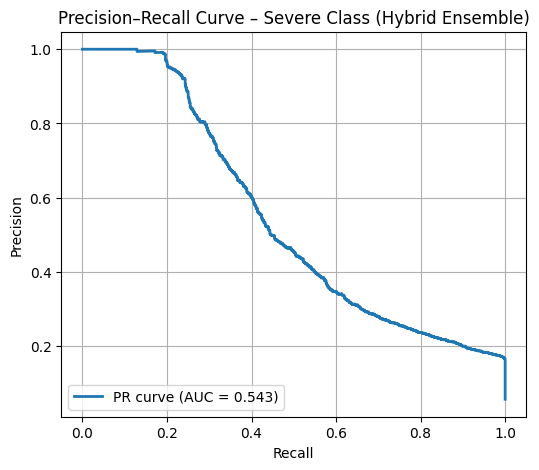

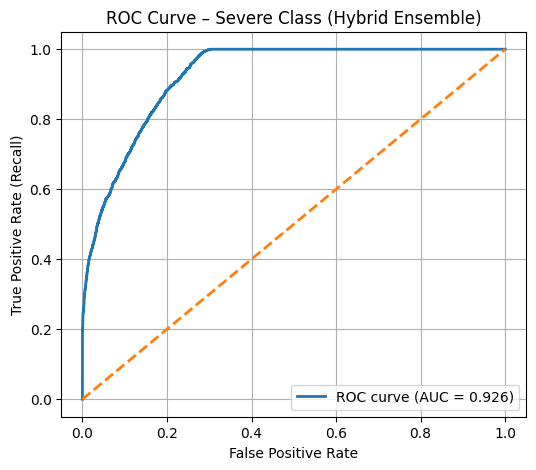


Hybrid Ensemble + Optimal Severe Threshold – Global Metrics
Accuracy:           0.8651
Balanced Accuracy:  0.6912
Macro F1-score:     0.6989
Weighted F1-score:  0.8651


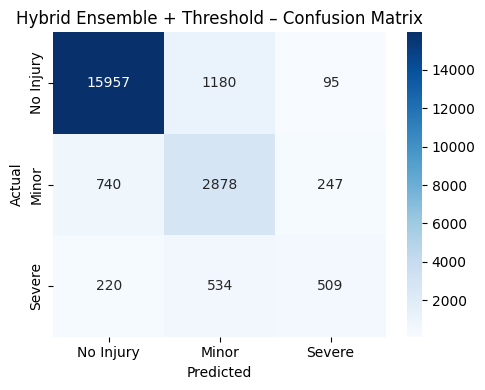

In [ ]:

# MODEL 5 - Hybrid Stacked Ensemble (RandomForest + XGBoost)


from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

print("\nSTEP 16: Hybrid Stacked Ensemble (RF + XGBoost)")

# 1) Base learners

rf_base = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    class_weight="balanced",
    random_state=42,
    n_jobs=-1
)

xgb_base = xgb.XGBClassifier(
    objective='multi:softprob',
    num_class=3,
    eval_metric='mlogloss',
    learning_rate=0.07,
    n_estimators=400,
    max_depth=7,
    subsample=0.8,
    colsample_bytree=0.8,
    tree_method='hist',
    random_state=42
)

# 2) Meta-learner

meta_learner = LogisticRegression(
    multi_class="multinomial",
    max_iter=1000,
    n_jobs=-1
)


# 3) Stacking classifier

stack_ensemble = StackingClassifier(
    estimators=[
        ("rf", rf_base),
        ("xgb", xgb_base)
    ],
    final_estimator=meta_learner,
    stack_method="predict_proba",
    passthrough=True,
    n_jobs=-1
)

print("\nFitting hybrid stacked model")
stack_ensemble.fit(X_train_processed, y_train_enc)


# 4) Baseline evaluation (argmax)

y_pred_stack_enc = stack_ensemble.predict(X_test_processed)
y_pred_stack = le.inverse_transform(y_pred_stack_enc)

print("\nHybrid Stacked Ensemble (Baseline Argmax) ")
print(classification_report(y_test, y_pred_stack, zero_division=0))

print("\nConfusion Matrix (Hybrid Baseline):")
print(confusion_matrix(y_test, y_pred_stack, labels=["No Injury", "Minor", "Severe"]))


#  Severe PR-AUC, ROC-AUC & Optimal Threshold (Hybrid)

from sklearn.metrics import (
    precision_recall_curve,
    roc_curve,
    roc_auc_score,
    average_precision_score,
    classification_report,
    confusion_matrix
)

print("\n Severe-focused evaluation (Hybrid Ensemble)")

# Probabilities from hybrid model
proba_stack = stack_ensemble.predict_proba(X_test_processed)

# Severe class index from label encoder
severe_idx = np.where(le.classes_ == "Severe")[0][0]
severe_proba_stack = proba_stack[:, severe_idx]

# True labels (binary Severe vs Rest)
y_true_binary_stack = (y_test_enc == severe_idx).astype(int)

# 1) PR curve & best F1 threshold for Severe

precision_h, recall_h, thresholds_h = precision_recall_curve(
    y_true_binary_stack,
    severe_proba_stack
)

f1_scores_h = (2 * precision_h * recall_h) / (precision_h + recall_h + 1e-9)
best_idx_h = np.argmax(f1_scores_h)
best_thr_h = thresholds_h[best_idx_h]
best_f1_h = f1_scores_h[best_idx_h]

print(f"\nBest Severe threshold (Hybrid, by F1): {best_thr_h:.4f}")
print(f"Best Severe F1 (Hybrid): {best_f1_h:.4f}")

# 2) Apply optimal Severe threshold
# Baseline argmax predictions in encoded form
y_pred_stack_argmax_enc = np.argmax(proba_stack, axis=1)
y_pred_stack_argmax = le.inverse_transform(y_pred_stack_argmax_enc)

# Override with Severe where probability >= threshold
y_pred_stack_opt = []
for i, p_sev in enumerate(severe_proba_stack):
    if p_sev >= best_thr_h:
        y_pred_stack_opt.append("Severe")
    else:
        y_pred_stack_opt.append(y_pred_stack_argmax[i])

print("\nHybrid Ensemble Results with Optimal Severe Threshold")
print(classification_report(y_test, y_pred_stack_opt, zero_division=0))

print("\nConfusion Matrix (Hybrid + Optimal Severe Threshold):")
print(confusion_matrix(y_test, y_pred_stack_opt, labels=["No Injury", "Minor", "Severe"]))

# 3) PR-AUC and ROC-AUC for Severe

roc_auc_h = roc_auc_score(y_true_binary_stack, severe_proba_stack)
pr_auc_h = average_precision_score(y_true_binary_stack, severe_proba_stack)

print(f"\nROC-AUC (Severe class, Hybrid): {roc_auc_h:.4f}")
print(f"PR-AUC (Severe class, Hybrid): {pr_auc_h:.4f}")

# PR Curve plot
plt.figure(figsize=(6, 5))
plt.plot(recall_h, precision_h, lw=2, label=f'PR curve (AUC = {pr_auc_h:.3f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision–Recall Curve – Severe Class (Hybrid Ensemble)')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()

# ROC Curve plot
fpr_h, tpr_h, _ = roc_curve(y_true_binary_stack, severe_proba_stack)
plt.figure(figsize=(6, 5))
plt.plot(fpr_h, tpr_h, lw=2, label=f'ROC curve (AUC = {roc_auc_h:.3f})')
plt.plot([0, 1], [0, 1], lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve – Severe Class (Hybrid Ensemble)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# FINAL EVALUATION METRICS ( RF & XGBoost) – Hybrid + Threshold

from sklearn.metrics import accuracy_score, balanced_accuracy_score, f1_score


print("\nHybrid Ensemble + Optimal Severe Threshold – Global Metrics")

acc_h_final = accuracy_score(y_test, y_pred_stack_opt)
bal_acc_h_final = balanced_accuracy_score(y_test, y_pred_stack_opt)
macro_f1_h_final = f1_score(y_test, y_pred_stack_opt, average="macro", zero_division=0)
weighted_f1_h_final = f1_score(y_test, y_pred_stack_opt, average="weighted", zero_division=0)

print(f"Accuracy:           {acc_h_final:.4f}")
print(f"Balanced Accuracy:  {bal_acc_h_final:.4f}")
print(f"Macro F1-score:     {macro_f1_h_final:.4f}")
print(f"Weighted F1-score:  {weighted_f1_h_final:.4f}")

# Confusion matrices (counts + normalized) for final hybrid predictions
cm_h_final = confusion_matrix(y_test, y_pred_stack_opt, labels=["No Injury", "Minor", "Severe"])
cm_h_final_norm = confusion_matrix(
    y_test,
    y_pred_stack_opt,
    labels=["No Injury", "Minor", "Severe"],
    normalize="true"
)

# Heatmap – Counts
plt.figure(figsize=(5, 4))
sns.heatmap(
    cm_h_final,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["No Injury", "Minor", "Severe"],
    yticklabels=["No Injury", "Minor", "Severe"]
)
plt.title("Hybrid Ensemble + Threshold – Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()




In [ ]:
# STEP 18: FULL EVALUATION MATRIX (5 MODELS)

import time
import pickle
from sklearn.metrics import (
    accuracy_score,
    balanced_accuracy_score,
    f1_score,
    roc_auc_score,
    average_precision_score
)
from IPython.display import display

SEVERE_LABEL = "Severe"

# Helper utilities

def benchmark_inference(model, X, n_runs=20):
    """
    Benchmark prediction latency & avg batch time (no throughput).
    """

    _ = model.predict(X[:10])

    start = time.perf_counter()
    for _ in range(n_runs):
        _ = model.predict(X)
    end = time.perf_counter()

    total_time = end - start
    avg_time_per_run = total_time / n_runs
    latency_per_sample = avg_time_per_run / X.shape[0]

    return {
        "latency_ms_per_sample": latency_per_sample * 1000.0,
        "avg_batch_time_ms": avg_time_per_run * 1000.0,
    }


def get_model_size_kb(model):
    """Return serialized model size in KB."""
    return len(pickle.dumps(model)) / 1024.0

y_test_enc = le.transform(y_test)

severe_enc = le.transform([SEVERE_LABEL])[0]


# 1) BASELINE RANDOM FOREST

rf_proba_eval = rf.predict_proba(X_test_processed)
severe_idx_rf_base = list(rf.classes_).index(SEVERE_LABEL)
severe_proba_rf_base = rf_proba_eval[:, severe_idx_rf_base]
y_true_binary_rf_base = (y_test == SEVERE_LABEL).astype(int)


# 2) BASELINE XGBOOST

xgb_proba_eval = xgb_model.predict_proba(X_test_processed)
# xgb_model.classes_ are encoded ints; find where "Severe" lives
severe_idx_xgb_base = list(xgb_model.classes_).index(severe_enc)
severe_proba_xgb_base = xgb_proba_eval[:, severe_idx_xgb_base]
y_true_binary_xgb_base = (y_test == SEVERE_LABEL).astype(int)


# 3) TUNED RANDOM FOREST + OPTIMAL SEVERE THRESHOLD

rf_tuned_proba_eval = rf_tuned.predict_proba(X_test_processed)
severe_idx_rf_tuned = list(rf_tuned.classes_).index(SEVERE_LABEL)
severe_proba_rf_tuned = rf_tuned_proba_eval[:, severe_idx_rf_tuned]
y_true_binary_rf_tuned = (y_test == SEVERE_LABEL).astype(int)


# 4) XGBOOST + SMOTE + OPTIMAL SEVERE THRESHOLD

xgb_smote_proba_eval = xgb_smote.predict_proba(X_test_processed)
severe_idx_smote = list(xgb_smote.classes_).index(severe_enc)
severe_proba_smote_eval = xgb_smote_proba_eval[:, severe_idx_smote]
y_true_binary_smote_eval = (y_test == SEVERE_LABEL).astype(int)


# 5) HYBRID STACKED ENSEMBLE + OPTIMAL SEVERE THRESHOLD

stack_proba_eval = stack_ensemble.predict_proba(X_test_processed)
severe_idx_stack = list(stack_ensemble.classes_).index(severe_enc)
severe_proba_stack_eval = stack_proba_eval[:, severe_idx_stack]
y_true_binary_stack_eval = (y_test_enc == severe_enc).astype(int)


# Build configs for all 5 models

models_eval = [
    {
        "name": "RandomForest_Baseline",
        "model": rf,
        "y_pred": rf_preds,
        "severe_proba": severe_proba_rf_base,
        "y_true_binary": y_true_binary_rf_base,
    },
    {
        "name": "XGBoost_Baseline",
        "model": xgb_model,
        "y_pred": xgb_preds,
        "severe_proba": severe_proba_xgb_base,
        "y_true_binary": y_true_binary_xgb_base,
    },
    {
        "name": "RF_Tuned_Threshold",
        "model": rf_tuned,
        "y_pred": np.array(rf_tuned_opt),
        "severe_proba": severe_proba_rf_tuned,
        "y_true_binary": y_true_binary_rf_tuned,
    },
    {
        "name": "XGBoost_SMOTE_Threshold",
        "model": xgb_smote,
        "y_pred": np.array(xgb_smote_pred_opt),
        "severe_proba": severe_proba_smote_eval,
        "y_true_binary": y_true_binary_smote_eval,
    },
    {
        "name": "Hybrid_Stack_Threshold",
        "model": stack_ensemble,
        "y_pred": np.array(y_pred_stack_opt),
        "severe_proba": severe_proba_stack_eval,
        "y_true_binary": y_true_binary_stack_eval,
    },
]


# Build evaluation rows


rows = []

for cfg in models_eval:
    name         = cfg["name"]
    model        = cfg["model"]
    y_pred       = cfg["y_pred"]
    severe_proba = cfg["severe_proba"]
    y_binary     = cfg["y_true_binary"]

    # Multi-class metrics
    acc       = accuracy_score(y_test, y_pred)
    bal_acc   = balanced_accuracy_score(y_test, y_pred)
    macro_f1  = f1_score(y_test, y_pred, average="macro",    zero_division=0)
    weight_f1 = f1_score(y_test, y_pred, average="weighted", zero_division=0)

    # Severe vs Rest metrics
    roc_auc = roc_auc_score(y_binary, severe_proba)
    pr_auc  = average_precision_score(y_binary, severe_proba)

    # Inference speed & model size
    bench   = benchmark_inference(model, X_test_processed)
    size_kb = get_model_size_kb(model)

    rows.append({
        "Model": name,
        "Accuracy": acc,
        "BalancedAccuracy": bal_acc,
        "MacroF1": macro_f1,
        "WeightedF1": weight_f1,
        "ROC_AUC_Severe": roc_auc,
        "PR_AUC_Severe": pr_auc,
        "Latency_ms_per_sample": bench["latency_ms_per_sample"],
        "AvgPredictionTime_ms": bench["avg_batch_time_ms"],
        "ModelSize_KB": size_kb,
    })


# Final evaluation table


eval_table = pd.DataFrame(rows).sort_values(by="MacroF1", ascending=False)
eval_table = eval_table.reset_index(drop=True)

print("\nFULL EVALUATION MATRIX (5 MODELS)")
display(eval_table)



FULL EVALUATION MATRIX (5 MODELS)


,Model,Accuracy,BalancedAccuracy,MacroF1,WeightedF1,ROC_AUC_Severe,PR_AUC_Severe,Latency_ms_per_sample,AvgPredictionTime_ms,ModelSize_KB
0,Hybrid_Stack_Threshold,0.865116,0.691217,0.698908,0.865071,0.925558,0.542946,0.108164,2418.545064,658493.614258
1,XGBoost_SMOTE_Threshold,0.860957,0.700924,0.697164,0.862793,0.928984,0.556951,0.041308,923.647797,4499.371094
2,RF_Tuned_Threshold,0.839758,0.735135,0.685035,0.852999,0.922699,0.527804,0.054754,1224.296726,24426.385742
3,XGBoost_Baseline,0.840519,0.739258,0.681509,0.855024,0.925406,0.544918,0.037375,835.713118,4456.960938
4,RandomForest_Baseline,0.864043,0.664312,0.676144,0.860893,0.921856,0.531930,0.066310,1482.688841,653642.797852


Total transformed features: 201


/tmp/ipython-input-901140893.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=rf_df, x="Importance", y="Feature", palette="viridis")


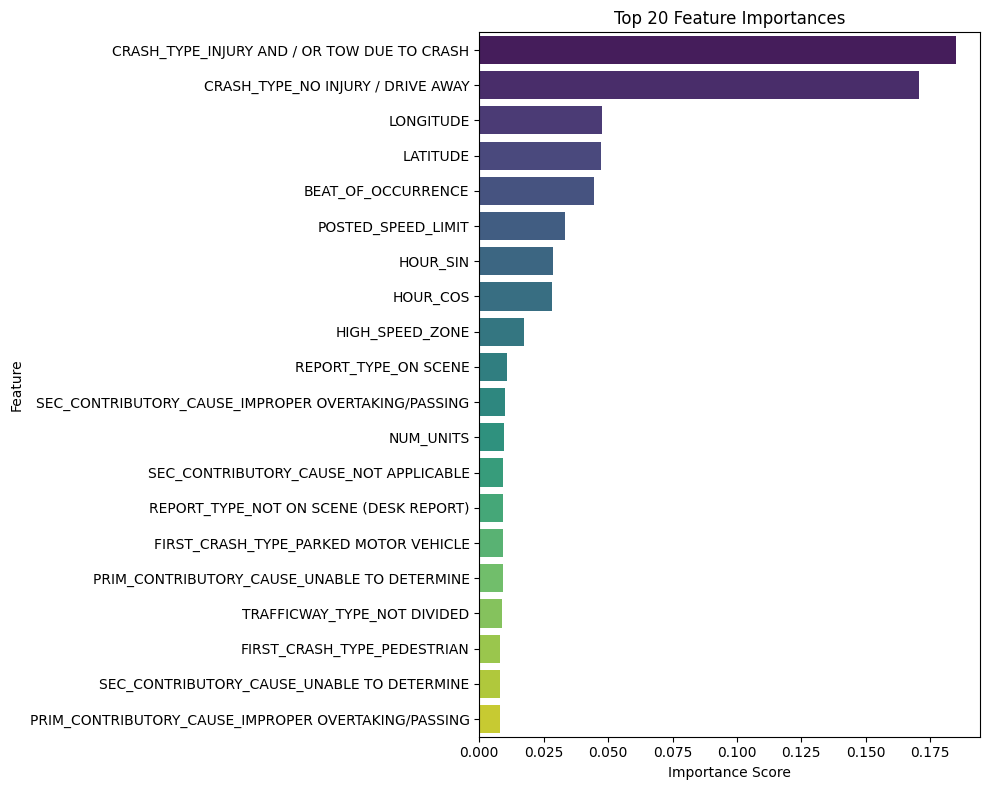

In [ ]:

# FINAL FEATURE IMPORTANCE


def get_feature_names(preprocessor):
    """
    Extract transformed feature names from a ColumnTransformer + OneHotEncoder pipeline.
    """
    output_features = []

    for name, transformer, cols in preprocessor.transformers_:
        if name == "remainder" and transformer == "drop":
            continue

        if hasattr(transformer, "get_feature_names_out"):
            f = transformer.get_feature_names_out(cols)
            output_features.extend(f)
        else:
            output_features.extend(cols)

    return output_features

feature_names = get_feature_names(preprocessor)
print(f"Total transformed features: {len(feature_names)}")


rf_importances = rf.feature_importances_

rf_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": rf_importances
}).sort_values(by="Importance", ascending=False).head(20)

plt.figure(figsize=(10, 8))
sns.barplot(data=rf_df, x="Importance", y="Feature", palette="viridis")
plt.title("Top 20 Feature Importances")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()



MODEL METRICS (macro)
             Model  Accuracy  Recall (macro)  Precision (macro)  F1 (macro)
0      RF Baseline  0.864043        0.664312           0.783333    0.676144
1     XGB Baseline  0.840519        0.739258           0.649750    0.681509
2   RF Tuned + Thr  0.839758        0.735135           0.668598    0.685035
3  XGB SMOTE + Thr  0.860957        0.700924           0.695215    0.697164
4     Hybrid + Thr  0.865116        0.691217           0.722705    0.698908


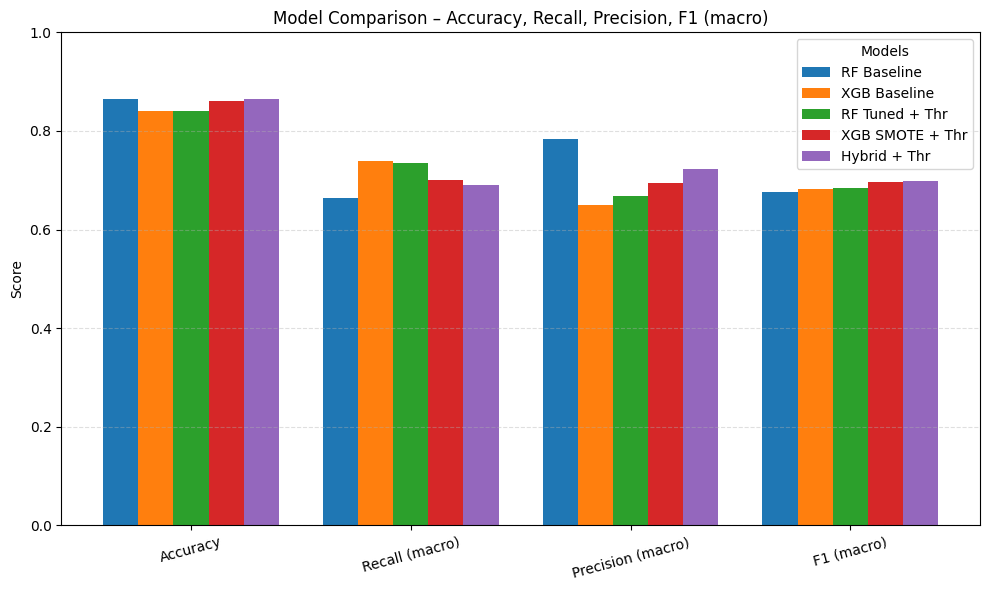

In [ ]:
# COMPARISON: Accuracy, Recall, Precision, F1 for multiple models

from sklearn.metrics import (
    accuracy_score,
    recall_score,
    precision_score,
    f1_score
)

# 1) Collect predictions for each model

model_names = [
    "RF Baseline",
    "XGB Baseline",
    "RF Tuned + Thr",
    "XGB SMOTE + Thr",
    "Hybrid + Thr"
]

model_preds = [
    rf_preds,              # baseline RandomForest
    xgb_preds,             # baseline XGBoost
    rf_tuned_opt,          # tuned RF with Severe threshold
    xgb_smote_pred_opt,    # XGB + SMOTE + Severe threshold
    y_pred_stack_opt       # Hybrid ensemble + Severe threshold
]


# 2) Compute metrics for each model


rows = []
for name, preds in zip(model_names, model_preds):
    acc  = accuracy_score(y_test, preds)
    rec  = recall_score(y_test, preds, average="macro", zero_division=0)
    prec = precision_score(y_test, preds, average="macro", zero_division=0)
    f1   = f1_score(y_test, preds, average="macro", zero_division=0)

    rows.append({
        "Model": name,
        "Accuracy": acc,
        "Recall (macro)": rec,
        "Precision (macro)": prec,
        "F1 (macro)": f1
    })

metrics_df = pd.DataFrame(rows)
print("\nMODEL METRICS (macro)")
print(metrics_df)

metrics_df = metrics_df.set_index("Model")

# 3) Plot: x-axis = metrics, colors = models


metrics = ["Accuracy", "Recall (macro)", "Precision (macro)", "F1 (macro)"]
x = np.arange(len(metrics))          # metric positions on x-axis
n_models = len(model_names)
width = 0.8 / n_models               # total width ~0.8, split across models

plt.figure(figsize=(10, 6))

for i, model in enumerate(model_names):
    # Offset each model's bars around each metric position
    offset = (i - (n_models - 1) / 2) * width
    plt.bar(
        x + offset,
        metrics_df.loc[model, metrics],
        width,
        label=model
    )

plt.xticks(x, metrics, rotation=15)
plt.ylabel("Score")
plt.ylim(0, 1.0)
plt.title("Model Comparison – Accuracy, Recall, Precision, F1 (macro)")
plt.legend(title="Models")
plt.grid(axis="y", linestyle="--", alpha=0.4)

plt.tight_layout()
plt.savefig("model_metric_comparison_by_metric.png", dpi=300)
plt.show()
